In [1]:
import matplotlib.pyplot as plt
import phoebe as pb
from phoebe import u
import pandas as pd 

In [2]:
pb.update_all_passbands()

In [3]:
logger = pb.logger()
b = pb.default_binary()

In [4]:
print(pb.__version__)

2.4.11


In [5]:
df = pd.read_csv("./TIC_465088681_combined1239.csv", sep="\t")
# df = pd.read_csv("./TIC_465088681_200.csv", sep="\t")
watts_units = u.W / (u.m * u.m)
flux =df['flux']
time = df['time']
sigma = df['flux_err']

In [6]:
#system 
b["ecc@binary"] = 0.26
# b["q@binary"] = 0.17
#trying something new:
b["q@binary"] = 0.18
b["sma@binary"] = 40 * u.solRad
b["incl@binary"] = 79.5
b["per0"] = 275 *u.deg
b["period@binary"] = 5.9525 *u.day
b['t0_supconj@component'] = 1629

b.add_dataset('lc', fluxes=flux.values*watts_units, times=time.values*u.day, sigmas = sigma.values*watts_units, overwrite=True)

#primary
# b["mass@primary@component"] = 13.5 #according to 2006, 10.4; 2004, 12; but higher for more recent: 14.5 +/- 1.1
# b.flip_constraint("sma@binary", solve_for="mass")
b["requiv@primary"] = 8.8 #2013: 8.8; 
b["teff@primary"] = 25000
b["gravb_bol@primary"] = 1.0
b["irrad_frac_refl_bol@primary"] = 1.0
# b.flip_constraint("logg@primary", solve_for="requiv@primary")
# b["logg@primary@star@component"] = 3.8
# b.flip_constraint("requiv@primary",solve_for="logg@primary")

#secondary
# b.flip_constraint("mass@secondary", solve_for="q")
# b["mass@secondary@component"] = 1.8

# b.flip_constraint("q@binary", solve_for="mass")
b["requiv@secondary@component"] = 1.3 #1.5+/-0.2
# b['teffratio@binary'] = 0.21
b["teff@secondary@component"] = 6000

b["gravb_bol@secondary"] = 0.7
b["irrad_frac_refl_bol@secondary"] = 0.7

#atmosphere
b.set_value_all("ld_mode", "manual")
b.set_value_all("ld_mode_bol", "manual")
b.set_value_all("atm", "ck2004")
b.set_value('pblum_mode', 'dataset-scaled')
# b.set_value('pblum_mode', 'component-coupled')

In [7]:
# b.flip_constraint("requiv@primary",solve_for="requivratio@binary")
# b['requivratio@binary@orbit@component'] = 0.17
b["teff@secondary@component"] = 7000
b["gravb_bol@secondary"] = 0.7
b["irrad_frac_refl_bol@secondary"] = 0.7
# b["mass@secondary@component"] = 0.8
# b["q@binary"] = 0.17
b["requiv@secondary@component"] = 1.3

Tue, 12 Mar 2024 10:35 BUNDLE       WARNING overwriting model: latest
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [00:28<00:00, 39.07it/s]


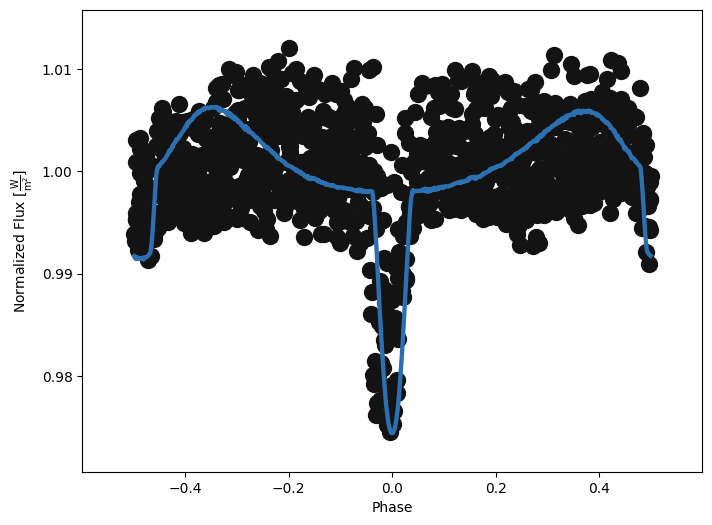

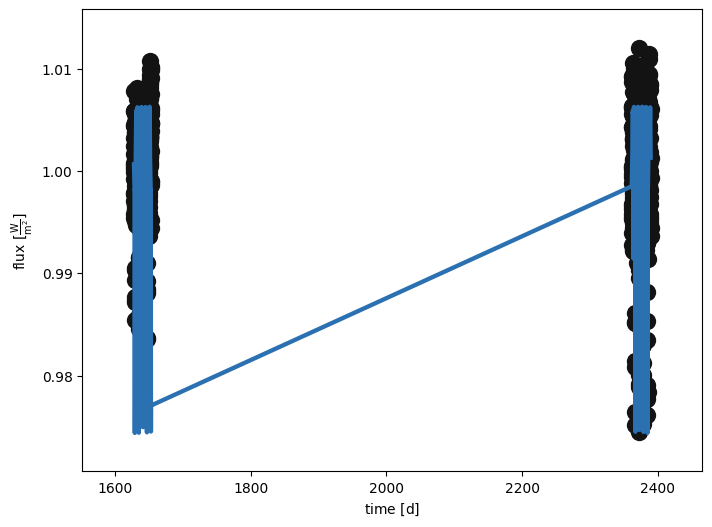

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [12]:
b["per0"] = 275 *u.deg
b["incl@binary"] = 79.5
# b["q@binary"] = 0.16
b["ecc@binary"] = 0.22
# b["requiv@primary"] = 9.2
b["requiv@secondary@component"] = 1.5 #1.5+/-0.2
b["teff@secondary@component"] = 5000
# b["teff@secondary@component"] = 6000
# b['t0_supconj@component'] = 1629
# b["sma@binary"] = 39 * u.solRad
b.run_compute()
plotter = b.plot(x='phase',  ylabel = 'Normalized Flux', xlabel = 'Phase', show=True, save = 'pbfit_combined.png', dpi = 1000)
# pb.parameters.ParameterSet.savefig(plotter, "lamscolightcurve.png")
# plt.savefig("lamscolightcurve.png", bbox_inches = 'tight', dpi =600)
b.plot(show=True)


In [8]:
b.flip_constraint("mass@primary", solve_for="sma@binary@component")
b["mass@primary"] = 14
print(b["mass@primary@component"])
print(b["mass@secondary@component"])
print(b["ecc@binary"])

Parameter: mass@primary@component
                       Qualifier: mass
                     Description: Mass
                           Value: 14.0 solMass
                  Constrained by: 
                      Constrains: logg@primary@component, mass@secondary@component
                      Related to: requiv@primary@component, logg@primary@component, sma@binary@component, period@binary@component, q@binary@component, mass@secondary@component

Parameter: mass@secondary@component
                       Qualifier: mass
                     Description: Mass
                           Value: 2.5199999999999987 solMass
                  Constrained by: sma@binary@component, period@binary@component, q@binary@component
                      Constrains: logg@secondary@component
                      Related to: requiv@secondary@component, logg@secondary@component, period@binary@component, q@binary@component, mass@primary@component, sma@binary@component

Parameter: ecc@binary@component
 

In [12]:
#save bundle to run on graham:
b.save("combined_15.bundle")

'combined_15.bundle'

Wed, 18 Oct 2023 11:54 BUNDLE       WARNING overwriting model: latest
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 554/554 [00:13<00:00, 41.11it/s]


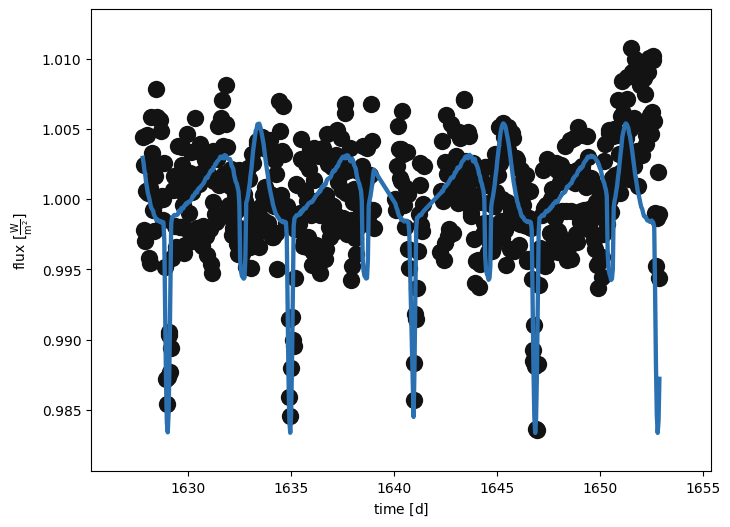

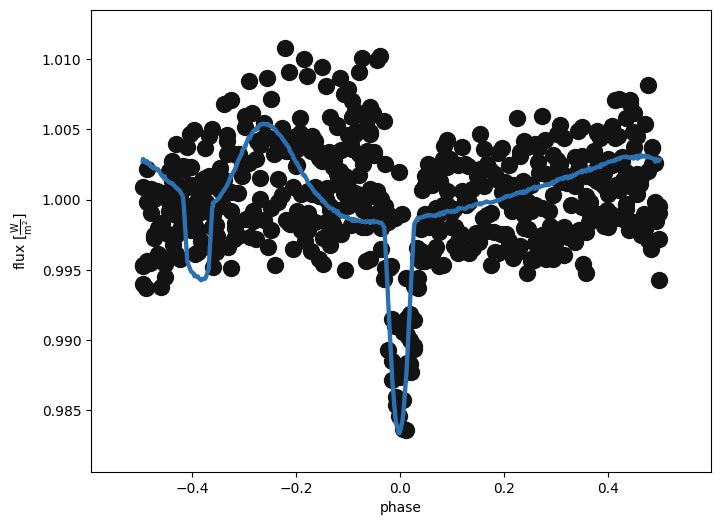

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [10]:
b.run_compute()
b.plot(show=True)
b.plot(x='phase', show=True)
### blue is synthetic, black is data

In [6]:
b['teff@secondary']

<Parameter: teff=7000.0 K | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [10]:
b.flip_constraint("esinw@binary@orbit", solve_for='ecc')
b.flip_constraint("ecosw@binary@orbit", solve_for='per0')
b.flip_constraint("teffratio@binary@orbit", solve_for='teff@primary')
b.flip_constraint('requivratio@binary', solve_for='requiv@primary')
b.flip_constraint("requivsumfrac@binary@orbit", solve_for='requiv@secondary')

<ConstraintParameter: {requiv@secondary@component} = (({requivratio@binary@component} * {requivsumfrac@binary@component}) * {sma@binary@component}) / ({requivratio@binary@component} + 1.000000) (solar units) => 1.3000000000000003 solRad>

In [11]:
b.add_solver('estimator.ebai', solver='ebaiest', ebai_method = 'mlp', overwrite=True)
b['phase_bin@ebaiest@solver'] = False
b.run_solver(solver='ebaiest', solution= "ebaiest_sol",kind='ebai', overwrite=True)
print(b.adopt_solution('ebaiest_sol', trial_run=True))
b.adopt_solution('ebaiest_sol')

ParameterSet: 6 parameters
   t0_supconj@binary@orbit@com...: 1628.953992048246 d
   teffratio@binary@orbit@comp...: 0.7998110803056391
   requivsumfrac@binary@orbit@...: 0.21245994315416009
     esinw@binary@orbit@component: -0.07039763475186522
     ecosw@binary@orbit@component: -0.12786724727406495
      incl@binary@orbit@component: 78.39168889194015 deg


<ParameterSet: 24 parameters | contexts: component, dataset>

Wed, 17 Jan 2024 20:12 BUNDLE       WARNING overwriting model: latest
Wed, 17 Jan 2024 20:12 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6251K<6600K), for which gravb_bol<0.9 (suggestion: 0.32) might be a better approx than gravb_bol=1.00.
Wed, 17 Jan 2024 20:12 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6251K<=6600K), for which irrad_frac_refl_bol<0.75 (suggestion: 0.6) might be a better approx than irrad_frac_refl_bol=1.00.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 554/554 [00:12<00:00, 43.04it/s]


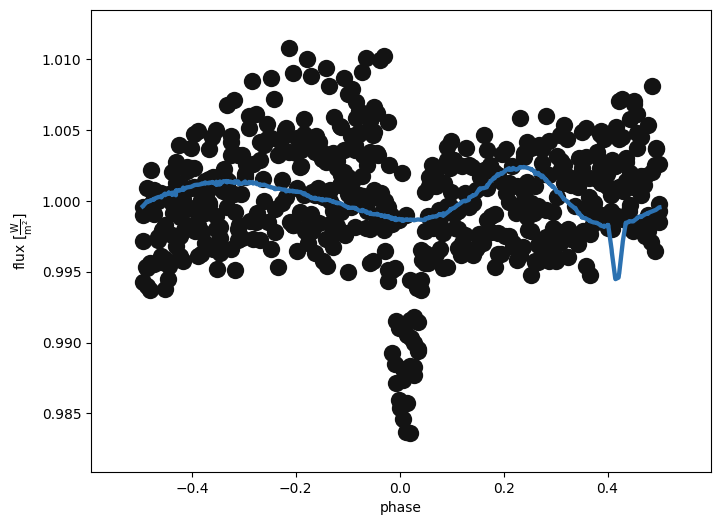

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [12]:
b.run_compute()
b.plot(x='phases', linestyle={'model': 'solid'},
           color={'ebai_model': 'red', 'model_orig': 'green'},
           save='figure_ebai.pdf',
           show=True)

In [22]:
print(b["mass@primary"])

ParameterSet: 2 parameters
C          mass@primary@component: 22.440454647018267 solMass
                  mass@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ({q@binary@component} + 1.000000)) * 2942.206217504419328179210424423218)


Sun, 22 Oct 2023 12:00 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6251K<6600K), for which gravb_bol<0.9 (suggestion: 0.32) might be a better approx than gravb_bol=1.00.
Sun, 22 Oct 2023 12:00 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6251K<=6600K), for which irrad_frac_refl_bol<0.75 (suggestion: 0.6) might be a better approx than irrad_frac_refl_bol=1.00.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 554/554 [00:12<00:00, 42.70it/s]


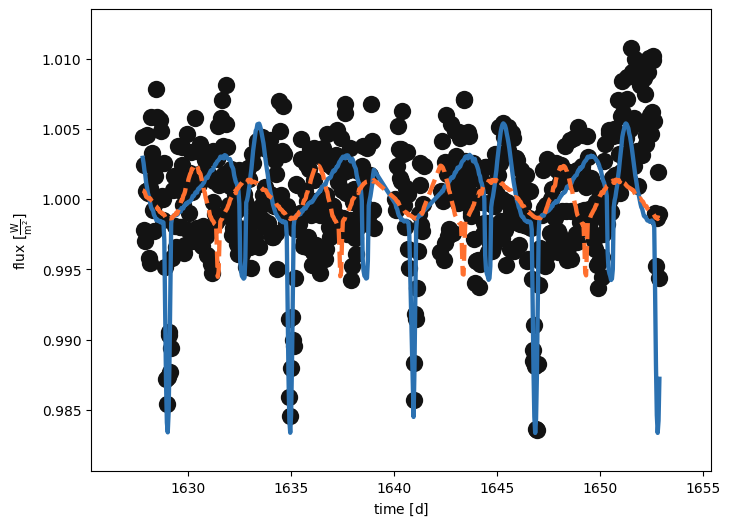

(<autofig.figure.Figure | 1 axes | 3 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [10]:
b.run_compute(model = 'ebai_model')
b.plot(show=True)

In [11]:
b.add_solver('optimizer.nelder_mead', solver='nm_solver')

<ParameterSet: 14 parameters | qualifiers: compute, priors_combine, initial_values, priors, fatol, use_server, adaptive, expose_lnprobabilities, maxiter, comments, continue_from, fit_parameters, progress_every_niters, xatol>

In [12]:
# print(b.filter(solver='nm_solver'))
b.add_compute('ellc', compute='fastcompute', overwrite=True)
b.set_value('compute', solver='nm_solver', value='fastcompute')
# b.set_value('compute', solver='nm_solver', value='phoebe01')
# ValueError: value for compute@nm_solver@solver must be one of ['phoebe01'], not 'fastcompute'
b.set_value('maxiter', 1000)
# b.set_value('maxfev', 1000)
# print(b.get_parameter('fit_parameters'))

In [13]:
b.set_value('fit_parameters', ['requivratio', 'sma@binary', 'teffratio@binary', "mass@primary"])
b.get_value('fit_parameters', expand=True)

['requivratio@binary@orbit@component',
 'sma@binary@orbit@component',
 'teffratio@binary@orbit@component',
 'mass@primary@star@component']

In [14]:
b.run_solver('nm_solver', solution='nm_sol_many', overwrite=True)

Sun, 22 Oct 2023 12:01 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6251K<6600K), for which gravb_bol<0.9 (suggestion: 0.32) might be a better approx than gravb_bol=1.00.
Sun, 22 Oct 2023 12:01 BUNDLE       WARNING 'primary' probably has a convective atm (teff=6251K<=6600K), for which irrad_frac_refl_bol<0.75 (suggestion: 0.6) might be a better approx than irrad_frac_refl_bol=1.00.
Sun, 22 Oct 2023 12:01 BUNDLE       WARNING fit_parameters contains the constrained parameter 'mass@primary@star@component'  If not addressed, this warning will continue to be raised and will throw an error at run_solver.


ValueError: failed to pass checks
Run Checks Report: FAIL
WARNING: 'primary' probably has a convective atm (teff=6251K<6600K), for which gravb_bol<0.9 (suggestion: 0.32) might be a better approx than gravb_bol=1.00. (2 affected parameters, affecting system,run_compute)
WARNING: 'primary' probably has a convective atm (teff=6251K<=6600K), for which irrad_frac_refl_bol<0.75 (suggestion: 0.6) might be a better approx than irrad_frac_refl_bol=1.00. (2 affected parameters, affecting system,run_compute)
ERROR: fit_parameters contains the constrained parameter 'mass@primary@star@component' (4 affected parameters, affecting run_solver)

In [31]:
b.run_compute(compute='fastcompute', sample_from='nm_sol_many', model='nm_model_many', overwrite=True)
# b.run_compute(compute='fastcompute', model='after_nm')

ValueError: sample_from=nm_sol_many not valid with choices=[]

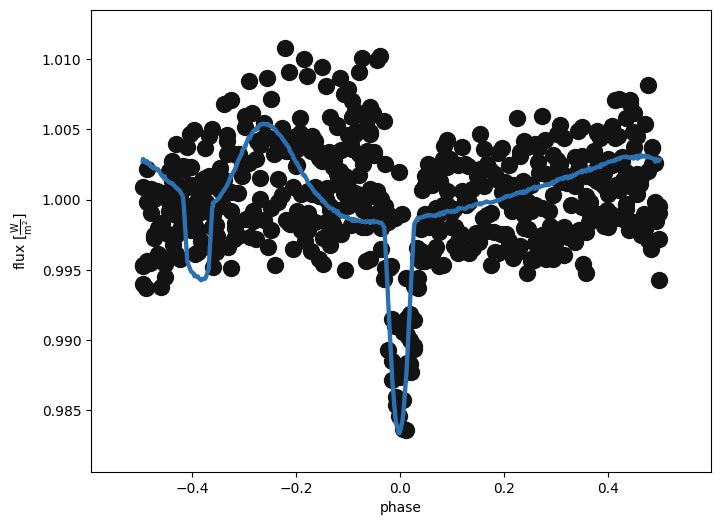

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [32]:
b.plot(x='phases', linestyle={'model': 'solid'},
           color={'nm_model_many': 'red', 'nm_model': 'green'},
#            save='figure_optimizer_nm.pdf',
           show=True)
# b.plot(x='phases', 
#            c={'after_estimators': 'red', 'after_nm': 'green', 'dataset': 'black'}, 
#            linestyle={'after_estimators': 'dashed', 'after_nm': 'solid'},
#            marker={'dataset': '.'},
#            save='figure_optimizer_nm.pdf', show=True)

In [46]:
# print(b.filter(solution='nm_sol'))
print(b.adopt_solution(solution='nm_sol_many', trial_run=True))
# b.adopt_solution(solution='nm_sol')

ParameterSet: 3 parameters
   requivratio@binary@orbit@co...: 0.1781159057329479
       sma@binary@orbit@component: 55.92938180844287 solRad
   teffratio@binary@orbit@comp...: 0.1281975048643848


In [27]:
print(b["mass@primary"])
print(b["mass@secondary"])
print(b["q@binary"])
print(b['requivratio'])

ParameterSet: 2 parameters
C          mass@primary@component: 4541.267963627489 solMass
                  mass@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ({q@binary@component} + 1.000000)) * 2942.206217504419328179210424423218)
Parameter: mass@secondary@component
                       Qualifier: mass
                     Description: Mass
                           Value: 1.8 solMass
                  Constrained by: 
                      Constrains: logg@secondary@component, mass@primary@component
                      Related to: requiv@secondary@component, logg@secondary@component, sma@binary@component, period@binary@component, q@binary@component, mass@primary@component

Parameter: q@binary@component
                       Qualifier: q
                     Description: Mass ratio
                           Value: 0.0003963650712569247
                  Constrained by: 
                      Constrains: mass@primary@

In [14]:
b.save('2.bundle')

'2.bundle'

In [20]:
b.add_solver('sampler.emcee',
             compute='fastcompute',
             solver='emcee_solver', overwrite=True)

<ParameterSet: 17 parameters | qualifiers: expose_failed, progress_every_niters, burnin_factor, thin_factor, init_from_combine, init_from, nwalkers, use_server, compute, continue_from, comments, init_from_requires, priors_combine, nlags_factor, continue_from_iter, niters, priors>

In [28]:
b.add_distribution({'teffratio': pb.gaussian_around(0.1),
                    'requivsumfrac': pb.gaussian_around(0.1),
                    'incl@binary': pb.gaussian_around(3),
                    'sma@binary': pb.gaussian_around(2),
                    'q': pb.gaussian_around(0.1)},
#                     'ecc': pb.gaussian_around(0.5),
#                     'per0': pb.gaussian_around(1)},
                    distribution='ball_around_optimized_solution', overwrite_all=True)

b.set_value('init_from', 'ball_around_optimized_solution') 

In [29]:
## priors

b.add_distribution({"ecc@binary": pb.gaussian(0.26, 0.01),
                    "q@binary": pb.gaussian(5.77, 0.1)},
                   distribution='priors_from_external_source', overwrite_all=True)


b.set_value('priors@emcee_solver', 'priors_from_external_source')

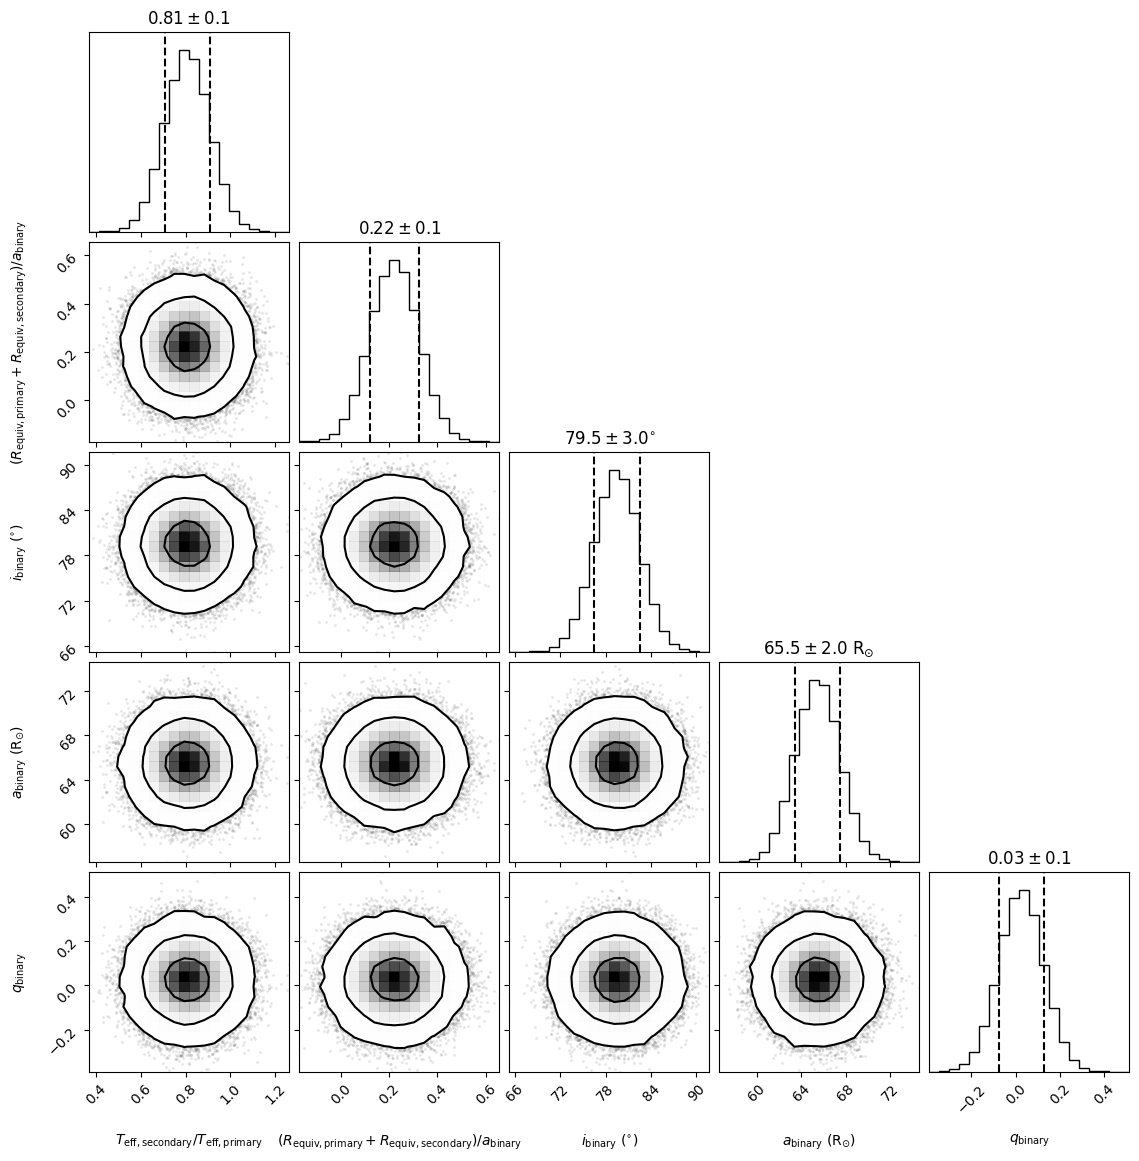

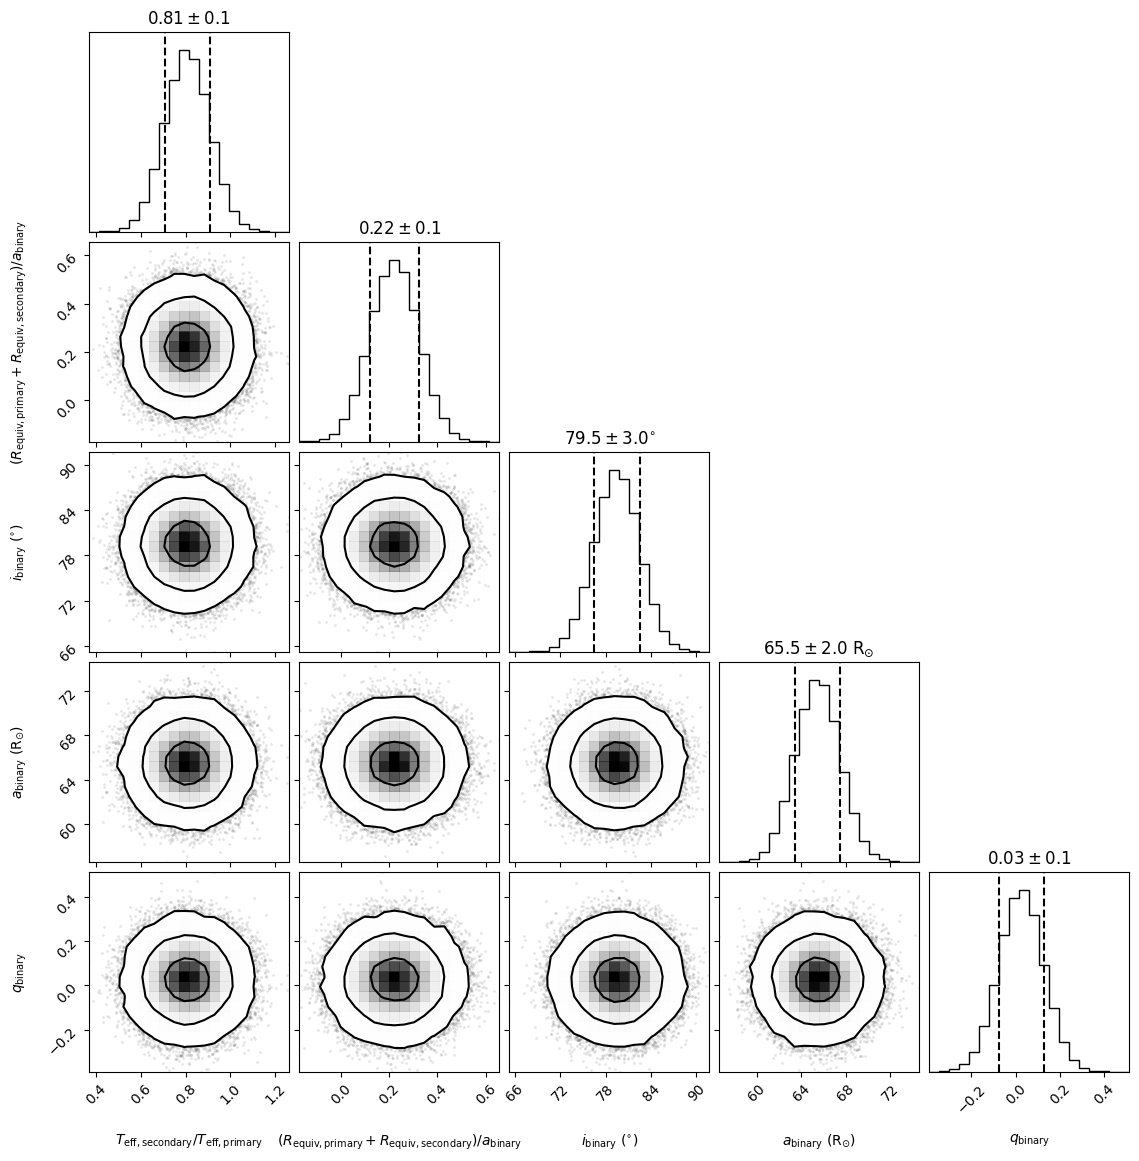

In [30]:
b.plot_distribution_collection('ball_around_optimized_solution', show=True)

In [31]:
b.run_compute(compute='fastcompute', sample_from='ball_around_optimized_solution', 
              sample_num=20, model='init_from_model', overwrite=True)

100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.52it/s]


<ParameterSet: 9 parameters | qualifiers: failed_samples, comments, sample_mode, sampled_twigs, fluxes, times, sampled_uniqueids, samples, flux_scale>

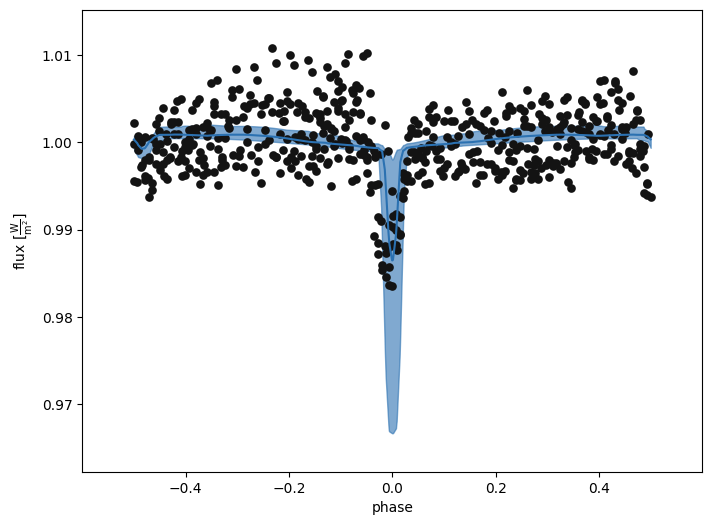

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [32]:
b.plot(dataset='lc01', x='phases', 
           marker={'dataset': '.'},
           model='init_from_model', show=True)

/Users/skbowes/anaconda3/lib/python3.10/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


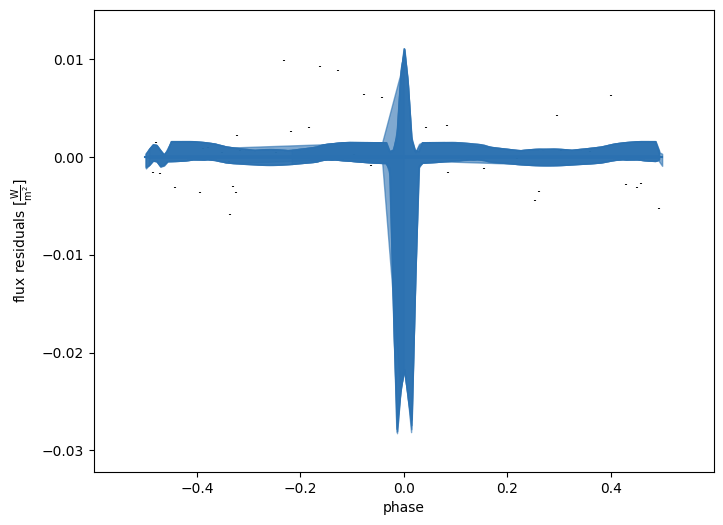

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [26]:
b.plot(dataset='lc01', x='phases', y='residuals',
           z={'dataset': 0, 'model': 1},
           model='init_from_model', show=True)

In [33]:
b.export_solver('initial_run_emcee.py',
                solver='emcee_solver',
                niters=1000, progress_every_niters=50,
                nwalkers=16,
                solution='emcee_sol',
                log_level='warning',
                pause=True)

Wed, 02 Aug 2023 15:11 BUNDLE       WARNING sampling with dataset-scaled can cause unintended issues.  Consider using component-coupled and marginalizing over pblum


* optional:  call b.save(...) to save the bundle to disk, you can then safely close the active python session and recover the bundle with phoebe.load(...)
* run inverse_run_emcee.py (within mpirun or on an external machine, if desired)
* once completed, copy inverse_run_emcee.py.out to this directory, if necessary
* press enter to exit this pause
* call b.import_solution('inverse_run_emcee.py.out')

(press enter to continue)


('inverse_run_emcee.py', 'inverse_run_emcee.py.out')

In [29]:
b.set_value('pblum', dataset='lc01', component='primary', value=pblums_scaled['pblum@primary@lc01'])
print(b.compute_pblums(compute='fastcompute', dataset='lc01', pbflux=True))

NameError: name 'pblums_scaled' is not defined

In [ ]:
b.add_dataset('orb', compute_times=time.values*u.day)
# b.add_dataset('orb', compute_times=np.linspace(-1,1,1001))
b.run_compute(ltte=False)

In [ ]:
print(b.get_parameter('fit_parameters'))

In [ ]:
afig, mplfig = b.plot(time='t0_supconj', show=True)

In [ ]:
print(b.filter('compute_phases'))

In [ ]:
afig, mplfig = b.plot(projection='3d', show=True)

In [ ]:
afig, mplfig = b.plot(x='times', show=True)
# u is a position on the sky

In [ ]:
print(b.get_parameter(qualifier='us', component='primary', kind='orb', context='model'))

In [ ]:
axs, artists = b.plot()

In [ ]:
b.add_dataset('mesh', include_times= 'lc01')

In [ ]:
b.set_value('compute_times', kind='mesh', value=[10])
b.set_value('include_times', kind='mesh', value=['lc01'])
b.set_value('columns', value=['teffs'])
b.run_compute()
# afig, mplfig = b.plot(kind='mesh', time=0.0, fc='teffs', ec='none', show=True)

In [ ]:
#will generate figure without time, but nothing gets plotted.
afig, mplfig = b.plot(kind='mesh', time=, fc='teffs', ec='none', show=True)

In [ ]:
afig, mplfig = b['lc01@model'].plot(x='phases', t0='t0_supconj', show=True)

In [ ]:
b.add_solver('optimizer.nelder_mead')
print(b.run_checks())
b.run_solver(kind='nelder_mead')
# print run checks, see which parameters are failing

In [ ]:
b.add_solver('estimator.ebai', solver='ebaiknn', ebai_method = 'knn', overwrite=True)
b['phase_bin@ebaiknn@solver'] = False
b.run_checks()
b.run_solver(solver='ebaiknn', solution= "ebaiknn_sol", kind='ebai', overwrite=True)
print(b.adopt_solution('ebaiknn_sol'))
b.adopt_solution('ebaiknn_sol')

In [ ]:
b.flip_constraint("ecc@binary@orbit", solve_for='esinw')
b.flip_constraint("per0@binary@orbit", solve_for='ecosw')

b.add_solver('estimator.lc_geometry', solver= 'lc_geo', overwrite=True)
# b['analytical_model@lc_geo'] = 'two-gaussian' ##this throws up an error, requires additional arguments
b['analytical_model@lc_geo'] = 'polyfit'
# print(b.get_solver(solver='lc_geo'))
print(b.run_checks())
b.run_solver(solver = 'lc_geo', solution = 'lc_geo_sol', kind='lc_geometry', overwrite=True)
b.adopt_solution('lc_geo_sol')

In [ ]:
b.add_solver('estimator.lc_periodogram', solver= 'lc_periodo', overwrite=True)
b.run_solver(solver= 'lc_periodo', solution = 'periodo_sol', kind='lc_periodogram', overwrite=True)
print(b.adopt_solution('periodo_sol'))
b.adopt_solution('periodo_sol')

b.run_compute()
b.plot(show=True)
b.plot(x='phase', show=True)

In [ ]:
# b.filter(component='primary', context='constraint')
print(b.filter(qualifier='atm'))
# b.set_value("logg@secondary@component", value = 3.4)
print(b.get_parameter('atm@primary@phoebe01@phoebe@compute'))
# print(b.get_parameter('q@binary@component'))

In [ ]:
""" set values """
# teff, requiv at prim or sec
# sma, period

b.set_value("teff@primary@component", value=25000)
# b.flip_constraint("teffratio@binary", solve_for = "teff@secondary")
# b.flip_constraint("teff@primary", solve_for = "teff@secondary")
b.set_value('ecc@binary@orbit@component', value=0.26)
b.set_value("teffratio@binary@component", value = 8.8)
# b.flip_constraint('teffratio@binary@component', solve_for='teff@primary')

# b.set_value("requiv@primary@component", value = 8.8)
# b.remove_constraint()
# b.set_value("teff@secondary@component", value=7000)

b.set_value("q@binary", value = 8.8)
b.set_value("sma@binary", value = 8.8)
b.set_value("per0@primary@component", value = 60)

### dont flip for teff ratio, try without flipping
 
# b.flip_constraint('requivsumfrac@binary@orbit', solve_for='sma')

""" we were here! try to get this running, with logg set (so it must be flipped)"""
b.flip_constraint('logg@primary', solve_for="requiv@primary") #its been flipped!
b.set_value("logg@primary@component", value = 3.8)

In [ ]:
print(b.filter(context='component'))
# mass @ binary, solve for q @ binary
#inclination , effective t, r equiv all have a big effect, so does sma

In [ ]:
### from the phoebe demos
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_mode_bol', 'manual')
b.set_value_all('atm', 'blackbody')

b.flip_constraint('requivsumfrac', solve_for='requiv@secondary')
b.flip_constraint('teffratio@binary', solve_for='teff@secondary')
b.flip_constraint("esinw@binary@orbit", solve_for='ecc')
b.flip_constraint("ecosw@binary@orbit", solve_for='per0')

In [ ]:
### only works AFTER lc periodogram
b.add_solver('estimator.ebai', solver='ebaiest', ebai_method = 'mlp', overwrite=True)
b['phase_bin@ebaiest@solver'] = False
# print(b['ebaiest'])
#mlp
b.run_solver(solver='ebaiest', solution= "ebaiest_sol",kind='ebai', overwrite=True)

### flip back to default for lc estimator ?
# print(b['ebaiest'])

### adopt
b.adopt_solution('ebaiest_sol')

In [14]:
#this one works!
# b.add_solver('estimator.lc_periodogram', solver= 'lc_periodo', overwrite=True)
# b.run_solver(solver= 'lc_periodo', solution = 'periodo_sol', kind='lc_periodogram', overwrite=True)
# print(b.get_solution('periodo_sol'))
b.adopt_solution('periodo_sol')

<ParameterSet: 23 parameters | contexts: dataset, component>

In [ ]:
print(b.get_solution('ebaiest_sol'))

In [ ]:
### add and run
# b.flip_constraint("ecc", solve_for='esinw@binary@orbit')
# b.flip_constraint("per0", solve_for='ecosw@binary@orbit')

b.set_value_all('ld_mode', 'lookup')
b.set_value_all('ld_mode_bol', 'lookup')
b['atm@secondary@compute'] = 'ck2004'
b['atm@primary@compute'] = 'ck2004'
b.set_value('pblum_mode', 'decoupled') #check the default is decoupled

b.add_solver('estimator.lc_geometry', solver= 'lc_geo', overwrite=True)
# b['analytical_model@lc_geo'] = 'two-gaussian' ##this throws up an error, requires additional arguments
b['analytical_model@lc_geo'] = 'polyfit'
print(b.get_parameter('requivsumfrac@binary@orbit@component'))
# print(b.get_solver(solver='lc_geo'))
print(b.run_checks())
b.run_solver(solver = 'lc_geo', solution = 'lc_geo_sol', kind='lc_geometry', overwrite=True)

### see if flipping should go here
# b.flip_constraint('requivsumfrac@binary@orbit', solve_for='sma') #its been flipped
# b.flip_constraint('requiv@primary@star', solve_for='logg') #its been flipped
#try mass flip q

#### adopt
b.adopt_solution('lc_geo_sol')

In [ ]:
b.run_compute()

In [ ]:
b.plot(show=True)
b.plot(x='phase', show=True)

In [ ]:
# b.flip_constraint("ecc", solve_for='esinw@binary@orbit')
# b.flip_constraint("per0", solve_for='ecosw@binary@orbit')

In [14]:
print(b.filter(component='primary', context='component'))

ParameterSet: 21 parameters
         requiv@primary@component: 9.2 solRad
C    requiv_max@primary@component: 16.765074218285193 solRad
           teff@primary@component: 25000.0 K
           abun@primary@component: 0.0
C          logg@primary@component: 3.8268468769027706
        syncpar@primary@component: 1.0
C        period@primary@component: 5.952 d
C          freq@primary@component: 1.0556426411290323 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 79.5 deg
C       long_an@primary@component: 0.0 deg
      gravb_bol@primary@component: 1.0
   irrad_frac_refl_bol@primary...: 1.0
C  irrad_frac_lost_bol@primary...: 0.0
    ld_mode_bol@primary@component: manual
    ld_func_bol@primary@component: logarithmic
   ld_coeffs_bol@primary@compo...: [0.5 0.5]
C          mass@primary@component: 20.718337305151046 solMass
C           sma@primary@component: 5.811965811965813 solRad
C         asini@primary@component: 5.

In [ ]:
### treats sun as a blackbody
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_mode_bol', 'manual')
b['atm@secondary@compute'] = 'blackbody'
b['atm@primary@compute'] = 'blackbody'
b.set_value('pblum_mode', 'dataset-scaled')

### resets
b.set_value_all('ld_mode', 'lookup')
b.set_value_all('ld_mode_bol', 'lookup')
b['atm@secondary@compute'] = 'ck2004'
b['atm@primary@compute'] = 'ck2004'
b.set_value('pblum_mode', 'decoupled') #check the default is decoupled

### WARNING Atmosphere parameters out of bounds: ldatm=ck2004, teff=[7339.76135311], logg=[7.34496037], abun=[0.]
### mass@primary@component: 807.0356768836715 solMass
### expected logg = 3-4, high 3 to low 4

In [ ]:
# print(b.filter())
# print(b.get_parameter('ld_mode_bol@primary', context='component'))
# print(b.get_parameter('atm@secondary', context='compute'))
# print(b.get_parameter('pblum_mode', context='dataset'))
# b.filter(context='system')

In [ ]:
# print(b.get_value('teffratio@binary@orbit@component'))
# print(b.get_parameter('teffratio@binary@orbit@component'))
# print(b.get_parameter('teffratio@binary@orbit@constraint'))
# b.flip_constraint('teffratio@binary@orbit', solve_for='teff@primary') seconda

# print(b.get_value('requivsumfrac@binary@orbit@component'))
# print(b.get_parameter('requivsumfrac@binary@orbit@component'))
# # print(b.get_parameter('requivsumfrac@binary@orbit@constraint'))
# # b.flip_constraint('requivsumfrac@binary@orbit', solve_for='sma')

# b.add_solver('estimator.rv_geometry', solver='rv_geo', overwrite=True)
# print(b.filter(solver='rv_geo_sol'))
# b.run_solver('rv_geo', solution='rv_geo_sol')
# # print(b.filter(solution='rv_geo_sol'))

# pb.list_available_solvers(devel=False)

In [ ]:
### for primary = A, secondary = B
# b.flip_constraint('logg@secondary', solve_for="requiv@secondary")
# b.set_value("logg@secondary@component", value = 4.0)
b.set_value('q@binary@component', value = 10.4)
b.flip_constraint("mass@primary", solve_for="q@binary")
# b.flip_constraint("mass@secondary", solve_for="q@binary")
b.set_value('mass@secondary@component', value = 8.1)

In [ ]:
#set values before you run the solver
b.run_compute()
# ERROR: constraints ['logg@primary@star@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)

In [ ]:
bls = lc.to_periodogram(method='bls')
bls.plot()
# peaks near 0.5
binned_periodo = bls.bin()

print(lombscargle.show_properties())
print(bls.show_properties())